# Fourier Series

Periodic functions can be represented as infinite sums of sines and cosines.

More precisely, if $f$ has period $2\pi$, there are unique $a_n$, $b_n$ such that

$$f(t) = {a_0\over 2} + \sum_{k=1}^{+\infty}(a_k\cos(kt) + b_k\sin(kt))$$ 

This representation of $f$ is called the Fourier series of $f$.

We can use the first few terms of the Fourier series as an approximation of the function:

In [1]:
from numpy import arange, sin, cos, pi
import math

# Computes the value of a function at times t, based on the first n+1
# Fourier coefficients of the function.
def compute_sample(fourier_coefficients, n, t):
    a0, b0 = fourier_coefficients(0)
    y = [a0/2 for i in t]
    for i in range(1, n + 1):
        a, b = fourier_coefficients(i)
        y += a*cos(i*t) + b*sin(i*t)
    return y

## Time and frequency domains

The function $f$ can be seen as:
* a function in the time domain
* or as the same function in the frequency domain, mapping frequencies $k\over 2\pi$ to $a_k$ and $b_k$.

We can draw the 2 representations based on the Fourier coefficients of $f$.

In [2]:
from matplotlib.pyplot import figure, show

# Draws a function based on the first n+1 Fourier coefficients of the 
# function.
def draw_time_domain(fourier_coefficients, n):
    fig = figure(1)
    ax1 = fig.add_subplot(211)
    ax1.set_xticks([i*pi for i in range(5)])
    ax1.set_xticklabels(["0", r"$\pi$", r"$2\pi$", r"$3\pi$", r"$4\pi$"])
    # Choose a range slightly larger than twice the period.
    eps = 0.05
    period = 2*pi
    t = arange(-eps, 2*period + eps, 0.001)
    ax1.plot(t, compute_sample(fourier_coefficients, n, t))
    ax1.grid(True)
    show()

# Draw a map from frequency to amplitude.
def draw_frequency_domain(fourier_coefficients, n):
    fig = figure(1)
    ax1 = fig.add_subplot(211)
    coefficient_array = [fourier_coefficients(i) for i in range(1, n+1)]
    ax1.plot(range(1, n+1), coefficient_array)
    ax1.grid(True)
    show()

def draw_fourier(fourier_coefficients):
    draw_time_domain(fourier_coefficients, 10000)
    draw_frequency_domain(fourier_coefficients, 50)

## Examples

### Square Wave

The Fourier series of the square wave is
$$f(x) = \sin(x) + {\sin(3x)\over 
3} + {\sin(5x)\over 5} + \cdots$$ that is:

In [3]:
def square_wave(i):
    a, b = 0, 0
    if i % 2 == 1:
        b = 1/i
    return a, b

This function can be represented in the time and frequency domains as follows:

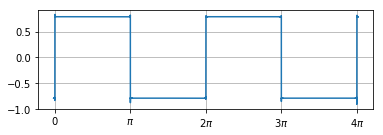

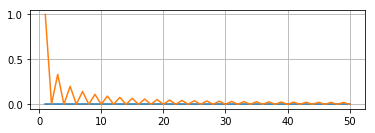

In [4]:
draw_fourier(square_wave)

It's interesting to see how successive sums approximate the function:

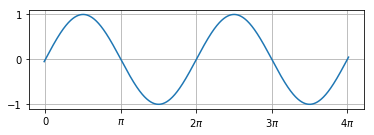

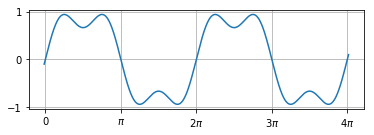

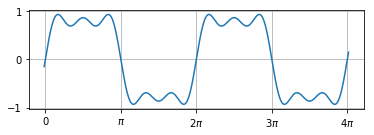

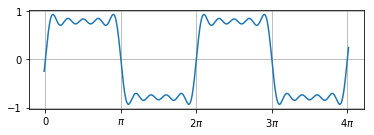

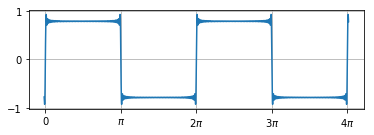

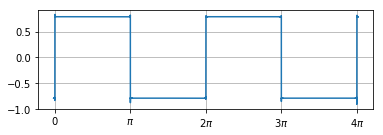

In [5]:
for i in [1, 3, 5, 10, 100, 10000]:
    draw_time_domain(square_wave, i)

### Sawtooth

$f(x) = \sin(x) + {\sin(2x)\over 2} + {\sin(3x)\over 3} + \cdots$

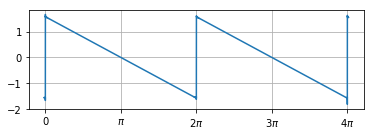

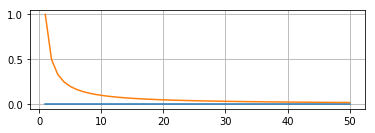

In [6]:
def sawtooth_wave(i):
    a, b = 0, 0
    if i > 0:
        b = 1/i
    return a, b

draw_fourier(sawtooth_wave)

### Step

$f(x) = \sin(x) + {\sin(2x)\over 2} + {\sin(4x)\over 4} + {\sin(5x)\over 5} + {\sin(7x)\over 7} + \cdots$

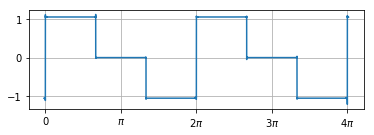

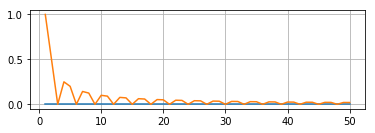

In [7]:
def step_wave(i):
    a, b = 0, 0
    if i % 3 != 0:
        b = 1/i
    return a, b

draw_fourier(step_wave)

### Parabola

$f(x) = \cos(x) + {\cos(2x)\over 4} + {\cos(3x)\over 9} + \cdots$

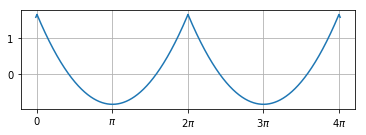

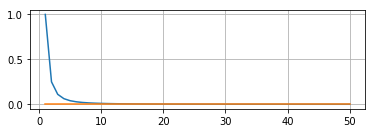

In [8]:
def parabola_wave(i):
    a, b = 0, 0
    if i > 0:
        a = 1/i**2
    return a, b

draw_fourier(parabola_wave)

### Pulse

$f(x) = {\sin(1/2)\over 1}\cos(x) + {\sin(2/2)\over 2}\cos(2x) + {\sin(3/2)\over 3}\cos(3x) + \cdots$

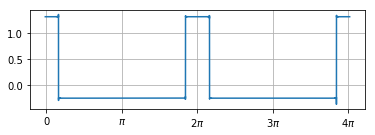

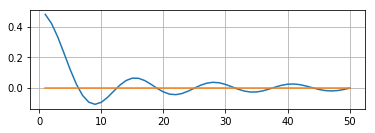

In [9]:
def pulse_wave(i):
    a, b = 0, 0
    if i > 0:
        a = sin(i/2)/i
    return a, b

draw_fourier(pulse_wave)

## Computing the Fourier coefficients

It can be easily shown that:

$$a_0 = {1\over \pi}\int_{-\pi}^{\pi}f(x)dx$$

$$k\ge 1, a_k = {1\over \pi}\int_{-\pi}^{\pi}f(x)\cos(kx)dx$$

$$k\ge 1, b_k = {1\over \pi}\int_{-\pi}^{\pi}f(x)\sin(kx)dx$$

### Example: Triangle Wave

The Triangle wave is the function defined over its period by: $f(t) = |t|$ over $(-\pi, \pi)$.

Let's calculate its Fourier coefficients.

In [10]:
from sympy import integrate, Symbol
import sympy

x = Symbol('x', real=True)
k = Symbol('k', integer=True, nonzero=True)

Pi = sympy.pi
Cos = sympy.cos(k*x)
Sin = sympy.sin(k*x)

(integrate(-x, (x, -Pi, 0)) + integrate(x, (x, 0, Pi)))/(2*Pi)

pi/2

$\implies a_0={\pi\over 2}$

In [16]:
(integrate(-x*Cos, (x, -Pi, 0)) + integrate(x*Cos, (x, 0, Pi)))/Pi

(2*(-1)**k/k**2 - 2/k**2)/pi

$\implies a_k=-{4\over \pi k^2}$ for $k$ odd ($0$ for $k$ even)

In [12]:
k = Symbol('k', integer=True, nonzero=True)

(integrate(-x*Sin, (x, -Pi, 0)) + integrate(x*Sin, (x, 0, Pi)))/Pi

0

$\implies b_k=0$

By plugging these numbers we get:

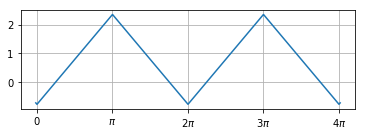

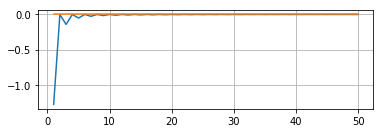

In [13]:
def triangle_wave(i):
    a, b = 0, 0
    if i == 0:
        a = pi/2
    if i%2 == 1:
        a = -4/(pi*i*i)
    return a, b

draw_fourier(triangle_wave)

## Approximating the Fourier coefficients

By approximating the integrals, we can estimate the Fourier coefficients.


$a_0 = {1\over \pi}\sum_{i = 0}^{N-1}f(-\pi + {i2\pi\over N}){2\pi\over N}dx = {2\over N}\sum_{i = 0}^{N-1}f(-\pi + {i2\pi\over N})$

$k\ge 1$, $a_k = {2\over N}\sum_{i = 0}^{N-1}f(-\pi + {i2\pi\over N})\cos(k(-\pi + {i2\pi\over N}))$

$k\ge 1$, $b_k = {2\over N}\sum_{i = 0}^{N-1}f(-\pi + {i2\pi\over N})\sin(k(-\pi + {i2\pi\over N}))$

In [27]:
def triangle(x):
    y = abs(x) % (2*pi)
    if y > pi:
        y = 2*pi - y
    return y

def appr_a(f, k, N):
    S = 0
    for i in range(N):
        x = -pi + i*2*pi/N
        S += f(x)*cos(k*x)
    S *= 2/N
    return S

def appr_b(f, k, N):
    S = 0
    for i in range(N):
        x = -pi + i*2*pi/N
        S += f(x)*sin(k*x)
    S *= 2/N
    return S

N = 1024
for k in range(1, N):
    now = appr_a(triangle, k, N)
    print(k, now)

1 -1.2732435394843153
2 -1.1761425167122752e-15
3 -0.14147505533544524
4 -1.1622647289044608e-16
5 -0.050933576719048614
6 -2.211772431870429e-16
7 -0.02598847561494162
8 -3.903127820947816e-17
9 -0.01572300207595504
10 -1.6132928326584306e-16
11 -0.010526636517300746
12 -2.7929047963226594e-16
13 -0.007537957816004496
14 -2.5673907444456745e-16
15 -0.005662838855251629
16 -3.608224830031759e-16
17 -0.004409670081030459
18 -2.749536709423239e-16
19 -0.0035309768061208644
20 -3.5128150388530344e-16
21 -0.0028911625606797284
22 -1.8041124150158794e-16
23 -0.0024108787696259185
24 -7.719519468096792e-17
25 -0.002041182717610574
26 -2.1684043449710089e-16
27 -0.0017505565324920716
28 -1.3183898417423734e-16
29 -0.0015179601045206591
30 -2.8796409701215e-16
31 -0.0013289130554827756
32 -2.2985086056692694e-16
33 -0.0011731852626685885
34 -1.1362438767648086e-16
35 -0.0010433831907284332
36 -3.5214886562329184e-16
37 -0.0009340558572860742
38 -1.5959455978986625e-16
39 -0.0008411130726353935

347 -1.5667664414199464e-05
348 -1.1547186817839616e-14
349 -1.5562195663001207e-05
350 -3.5384022101236923e-15
351 -1.545894840667859e-05
352 -5.160802341031001e-16
353 -1.5357877820582413e-05
354 -8.093786058038788e-15
355 -1.525894041975659e-05
356 -1.876537120137911e-15
357 -1.516209398021032e-05
358 2.104219576359867e-15
359 -1.5067297577249852e-05
360 -5.3316726034147166e-15
361 -1.4974511439157148e-05
362 -2.7564756033271465e-15
363 -1.4883697039254698e-05
364 -1.6406147274050653e-15
365 -1.4794816893321482e-05
366 -2.091642831159035e-15
367 -1.4707834689025884e-05
368 1.0897099195217308e-14
369 -1.4622715139708461e-05
370 -4.821663901477535e-15
371 -1.4539423975419921e-05
372 -4.573598444412852e-15
373 -1.445792799033372e-05
374 1.7199783264310042e-15
375 -1.4378194932484004e-05
376 2.2401351607026498e-14
377 -1.4300193411740693e-05
378 -5.687290915989962e-15
379 -1.4223893019197492e-05
380 6.055052292897045e-15
381 -1.4149264234944448e-05
382 -3.557050487490443e-15
383 -1.4076

726 -1.5460722979643293e-14
727 -1.9191224297297315e-05
728 -1.0612170864288117e-15
729 -1.9375903344142622e-05
730 5.126975233249453e-15
731 -1.9564741316839638e-05
732 2.5370330836160804e-15
733 -1.975784840817815e-05
734 -2.246466901389965e-16
735 -1.995533871357834e-05
736 2.0001361678012586e-14
737 -2.01573302960399e-05
738 -3.0357660829594124e-16
739 -2.0363945545368804e-05
740 1.0899267599562279e-14
741 -2.0575311048573507e-05
742 5.885049392251318e-16
743 -2.0791558127372157e-05
744 -1.8132067028386878e-13
745 -2.1012823013558503e-05
746 4.637783213023994e-15
747 -2.1239246738666544e-05
748 1.1253368029096045e-14
749 -2.1470975368510022e-05
750 5.5012418231914495e-16
751 -2.1708160637274264e-05
752 -2.4647167987112972e-15
753 -2.195095997813807e-05
754 3.794924444133763e-15
755 -2.219953660972365e-05
756 -1.2889754368028417e-14
757 -2.2454060003548827e-05
758 2.3575976240697294e-16
759 -2.2714706070443662e-05
760 8.942607938877689e-15
761 -2.298165749137622e-05
762 -1.173965980

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

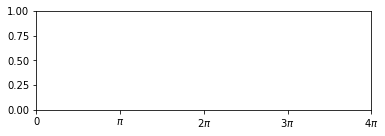

In [28]:
def draw_me():
    fig = figure(1)
    ax1 = fig.add_subplot(211)
    ax1.set_xticks([i*pi for i in range(5)])
    ax1.set_xticklabels(["0", r"$\pi$", r"$2\pi$", r"$3\pi$", r"$4\pi$"])
    t = arange(-0.05, 2*2*pi + 0.05, 0.001)
    ax1.plot(t, triangle(t), color='b')
    ax1.grid(True)
    show()
    
draw_me()